## Polynomial Regression

In [20]:
#Load necessary libararies and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston_sklearn=load_boston()

In [5]:
X=boston_sklearn.data
y=boston_sklearn.target
boston=pd.DataFrame(X, columns=boston_sklearn.feature_names)
boston['MEDV']=boston_sklearn.target
display(boston.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### From the previous notebook, we determined that the two features that have the strongest correlation with MEDV are LSTAT and RM

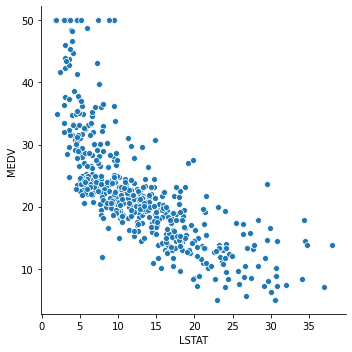

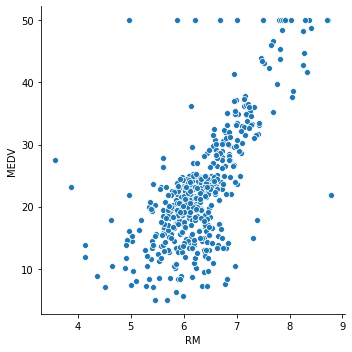

In [21]:
#Let's take a look at the scatterplots one more time
sns.relplot(x='LSTAT', y='MEDV', data=boston, kind='scatter')
sns.relplot(x='RM', y='MEDV', data=boston, kind='scatter')
plt.show()

### The scatterplots show that a quadratic curve may be a better fit than a linear one. Let's use PolynomialFeatures to transform our training data

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
X=boston[['LSTAT', 'RM']]
y=boston['MEDV']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#### X_poly should now contain the original features of X plus the square of the feature. Let's double check to make sure

In [23]:
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X_train)

print(X_train)
print(X_poly)

     LSTAT     RM
477  24.91  5.304
15    8.47  5.834
332   7.83  6.031
423  23.29  6.103
19   11.28  5.727
..     ...    ...
106  18.66  5.836
270  13.00  5.856
348   5.99  6.635
435  23.27  6.629
102  10.63  6.405

[404 rows x 2 columns]
[[ 24.91       5.304    620.5081   132.12264   28.132416]
 [  8.47       5.834     71.7409    49.41398   34.035556]
 [  7.83       6.031     61.3089    47.22273   36.372961]
 ...
 [  5.99       6.635     35.8801    39.74365   44.023225]
 [ 23.27       6.629    541.4929   154.25683   43.943641]
 [ 10.63       6.405    112.9969    68.08515   41.024025]]


In [24]:
#The fourth column is the interaction variable between LSTAT and RM

In [25]:
poly_model=LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

In [26]:
y_train_pred=poly_model.predict(X_poly)
y_test_pred=poly_model.predict(poly_features.fit_transform(X_test))

In [28]:
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [29]:
print('The RMSE of the training set is {} and the r2 score for the training set is {}'.format(rmse_train, r2_train))
print('The RMSE of the test set is {} and the r2 score for the test set is {}'.format(rmse_test, r2_test))

The RMSE of the training set is 4.588765873742464 and the r2 score for the training set is 0.7576154344716141
The RMSE of the test set is 4.293457550635844 and the r2 score for the test set is 0.7486318454509315


## We can see that both these score are higher than the ones produced with the linear regression model

## What if we try transform the data with PolyFeatures using degree=3? Let's see if the model score improves

In [30]:
poly_features=PolynomialFeatures(degree=3, include_bias=False)
X_poly_three=poly_features.fit_transform(X_train)

poly_three_model=LinearRegression()
poly_three_model.fit(X_poly_three, y_train)

y_train_pred=poly_three_model.predict(X_poly_three)
y_test_pred=poly_three_model.predict(poly_features.fit_transform(X_test))

rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('The RMSE of the training set is {} and the r2 score for the training set is {}'.format(rmse_train, r2_train))
print('The RMSE of the test set is {} and the r2 score for the test set is {}'.format(rmse_test, r2_test))

The RMSE of the training set is 4.358450587644786 and the r2 score for the training set is 0.7813359361230123
The RMSE of the test set is 6.009574278103474 and the r2 score for the test set is 0.5075259798735869


### The r2 score improves on the training set but decreases dramatically on the test set suggesting the model is overfitting the training set. A second degree polynomial model works better for the data.